In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme(style = "white")

# matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# nltk
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punct')
nltk.download('brown')

# dir paths
DATA_DIR = '../data'
IMG_DIR = '../img'

[nltk_data] Downloading package stopwords to /home/milos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading punct: Package 'punct' not found in index
[nltk_data] Downloading package brown to /home/milos/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [9]:
df = pd.read_json(f'{DATA_DIR}/fine_filtered2020.json.bz2', lines=True, compression='bz2')

# Quote length histogram

Caclulcate size of each quote and show their length distribution in form of a log-lin histogram.

In [10]:
def count_words(sentence):
    # maybe use advanced features from NLTK
    return len(sentence.split())

In [11]:
sentence_lengths = df.apply(lambda row: count_words(row.quotation), axis=1).rename('length').reset_index()
sentence_lengths

,index,length
0,0,27
1,1,62
2,2,47
3,3,23
4,4,30
...,...,...
4267,4267,25
4268,4268,55
4269,4269,35
4270,4270,53


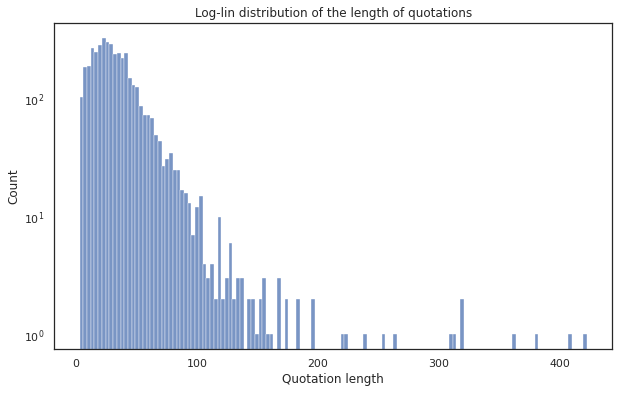

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=sentence_lengths, x='length', ax=ax)

ax.set_yscale('log')
ax.set(title='Log-lin distribution of the length of quotations', xlabel='Quotation length')

plt.show()

# Wordcloud

In this section we are going to create wordcloud based on frequency of each word in quotations.

In [6]:
from collections import Counter
from functools import reduce

from textblob import TextBlob

# Old way
# def get_word_frequencies(sentence, stop_wrods):
#     tokens = [token.lower() for token in word_tokenize(sentence)]
#     # Remove stop words and punctuation
#     tokens = filter(lambda word: word not in stop_words and word.isalnum(), tokens)
#     return Counter(tokens)

# New way
def get_word_frequencies(sentence):
#     tokens = [token.lower() for token in word_tokenize(sentence)]
#     # Remove stop words and punctuation
#     tokens = filter(lambda word: word not in stop_words and word.isalnum(), tokens)
    return Counter(TextBlob(sentence).noun_phrases)


First we calculate frequency of each word:

In [7]:
word_frequencies = Counter()
for sentence_freq in map(get_word_frequencies, list(df['quotation'])):
    word_frequencies.update(sentence_freq)

In the next step we create a wordcloud based on the calculated word frequencies. The word cloud contains top 200 most frequent words (stopwords excluded).

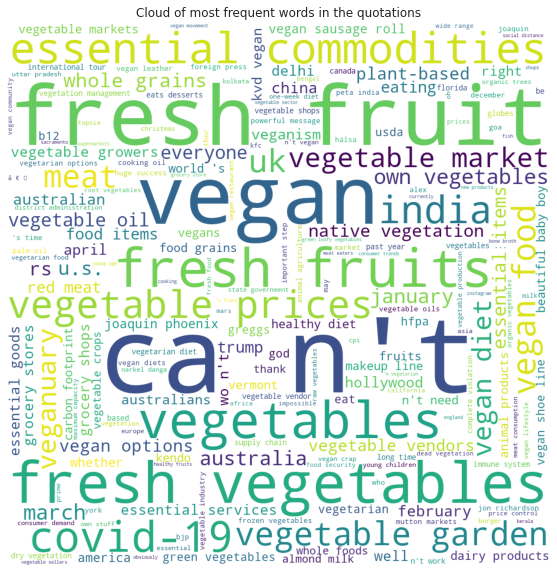

In [44]:
from wordcloud import WordCloud
from PIL import Image

USE_MASK = False # by setting to True, it will use cow mask to display wordcloud
WC_BACKGROUND = 'white'
MAX_WORDS = 200
WC_WIDTH, WC_HEIGHT = 1000, 1000
STOPWORDS = stopwords.words('english')

if USE_MASK:
    # Source: https://www.flaticon.com/free-icon/cow-silhouette_62470
    image_mask = 255 - np.array(Image.open(f'{IMG_DIR}/cow_mask.png'))
    word_cloud = WordCloud(
        background_color=WC_BACKGROUND, 
        max_words=MAX_WORDS, 
        width=WC_WIDTH, 
        height=WC_HEIGHT,
        stopwords=STOPWORDS, 
        mask=image_mask, 
        contour_width=1, 
        contour_color='green')
else:
    word_cloud = WordCloud(
        background_color=WC_BACKGROUND, 
        max_words=MAX_WORDS, 
        width=WC_WIDTH, 
        height=WC_HEIGHT,
        stopwords=STOPWORDS)

# Calculate wordcloud
wc = word_cloud.generate_from_frequencies(word_frequencies)

# Plot wordcloud
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(wc)
ax.axis('off')
ax.set(title='Cloud of most frequent words in the quotations')
plt.show()

# Other

In [16]:
df['date'] = pd.to_datetime(df['date']).apply(lambda x: x.strftime('%b %Y'))
df.index = pd.to_datetime(df['date'])
df

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
date,,,,,,,,,
2020-03-01,2020-03-18-001607,a special lifelong animal advocate.,None,[],Mar 2020,1,"[[None, 0.8046], [Betty White, 0.085], [Winona...",[https://www.nbc15.com/content/news/Henry-Vila...,E
2020-02-01,2020-02-19-002557,Academic environments are not the best places ...,Lewis Von Thaer,[Q22096796],Feb 2020,2,"[[Lewis Von Thaer, 0.5349], [None, 0.2953], [C...",[https://www.thelantern.com/2020/02/student-co...,E
2020-04-01,2020-04-03-002052,After talking with Chris about his background ...,Brad Smith,"[Q15477554, Q16218831, Q23664265, Q24084114, Q...",Apr 2020,1,"[[Brad Smith, 0.7482], [None, 0.2469], [Chris ...",[http://www.hmenews.com/article/brief-package-...,E
2020-03-01,2020-03-29-001856,Animal caretaker Ambre Cook talks about the re...,None,[],Mar 2020,2,"[[None, 0.6996], [Sarah Silverman, 0.3004]]",[http://newsok.com/article/5658897/interviews-...,E
2020-02-01,2020-02-02-004706,Because this hardworking talented human of min...,Ashwiny Iyer Tiwari,[Q28012317],Feb 2020,2,"[[Ashwiny Iyer Tiwari, 0.4128], [None, 0.3853]...",[https://www.hindustantimes.com/bollywood/kang...,E
...,...,...,...,...,...,...,...,...,...
2020-03-01,2020-03-19-074484,This is not an ethical way to deal with crime ...,Nivedita Menon,[Q16733425],Mar 2020,2,"[[Nivedita Menon, 0.8647], [None, 0.1353]]",[https://www.dw.com/en/delhi-bus-gang-rape-con...,E
2020-03-01,2020-03-12-079906,We are successfully transitioning the plastic ...,Donald Thomson,[Q43395158],Mar 2020,1,"[[Donald Thomson, 0.8117], [None, 0.1883]]",[https://www.waste360.com/design-and-construct...,E
2020-02-01,2020-02-09-052059,We found that microbes may be the necessary li...,Eric Griffin,"[Q1351311, Q16887676, Q728728]",Feb 2020,1,"[[Eric Griffin, 0.6314], [None, 0.3686]]",[https://www.abqjournal.com/1418350/little-thi...,E


[Text(0.5, 0, 'Month')]

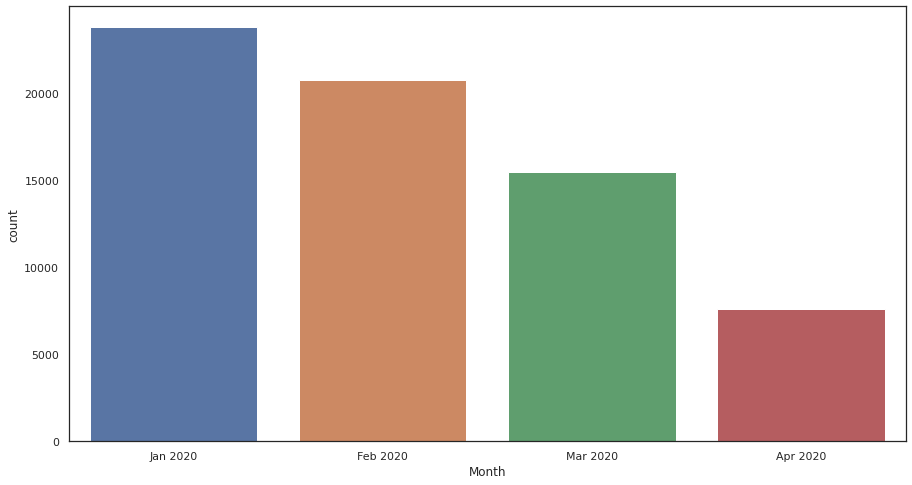

In [4]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(data=df, x='date', ax=ax, order=['Jan 2020', 'Feb 2020', 'Mar 2020', 'Apr 2020'])

ax.set(title='Number of topic related quotations per month', xlabel='Month')
# sns.despine(bottom = True, left = True)